# Anne's IBM Data Science Coursera Capstone:
### Predicting Accident Severity in Great Britain

In this notebook we create a classification model to predict whether a car accident in Great Britain would be fatal or non-fatal, given a set of features/conditions

In [126]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.utils import resample
import matplotlib
%matplotlib inline
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


### Load Accident Data From CSV File

In [127]:
#import dataset and view
df = pd.read_csv('acc2005_2016.csv')
df.head()

C:\Users\abode\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing.Human_Control,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [131]:
#descriptive statistics of dataset
round(df.describe(),2)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_.District.,...,X2nd_Road_Number,Pedestrian_Crossing.Human_Control,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,1917129.00,1917129.00,1917129.00,1917129.00,1917274.00,1917274.00,1917274.00,1917274.00,1917274.00,1917274.00,...,1917274.00,1917274.00,1917274.00,1917274.00,1917274.00,1917274.00,1917274.00,1917274.00,1917274.00,1917274.00
mean,440787.01,297787.56,-1.42,52.57,30.69,2.84,1.83,1.35,4.12,352.52,...,374.24,0.01,0.74,1.95,1.57,1.35,0.11,0.07,1.36,1.20
std,95483.63,160953.29,1.40,1.45,25.50,0.40,0.71,0.82,1.92,259.26,...,1290.94,0.13,1.83,1.65,1.65,0.62,0.73,0.62,0.48,0.41
min,64950.00,10290.00,-7.52,49.91,1.00,1.00,1.00,1.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00
25%,377346.00,177890.00,-2.34,51.49,7.00,3.00,1.00,1.00,2.00,120.00,...,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00
50%,442260.00,263260.00,-1.37,52.25,31.00,3.00,2.00,1.00,4.00,327.00,...,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00
75%,523810.00,396070.00,-0.21,53.46,46.00,3.00,2.00,1.00,6.00,531.00,...,0.00,0.00,0.00,4.00,1.00,2.00,0.00,0.00,2.00,1.00
max,655540.00,1208800.00,1.76,60.76,98.00,3.00,67.00,93.00,7.00,941.00,...,9999.00,2.00,8.00,7.00,9.00,5.00,7.00,7.00,3.00,3.00


In [136]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_.District.', 'Local_Authority_.Highway.',
       'X1st_Road_Class', 'X1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', 'X2nd_Road_Class',
       'X2nd_Road_Number', 'Pedestrian_Crossing.Human_Control',
       'Pedestrian_Crossing.Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

### Data pre-processing

Here we want to exclude features (columns) that are not predictive. These include features that are location based, or related to post-accident factors like whether police arrived on the scene

Also want to remove null values, if present

In [137]:
#exclude nonpredictive features
df_cut = df[['Accident_Severity',
             'Day_of_Week',
             'Light_Conditions',
             'Weather_Conditions',
             'Road_Surface_Conditions',
             'Special_Conditions_at_Site',
             'Carriageway_Hazards',
             'Urban_or_Rural_Area',
             'Road_Type',
             'Speed_limit']]
df_cut.head()

,Accident_Severity,Day_of_Week,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Road_Type,Speed_limit
0,2,3,1,2,2,0,0,1,6,30.0
1,3,4,4,1,1,0,0,1,3,30.0
2,3,5,4,1,1,0,0,1,6,30.0
3,3,6,1,1,1,0,0,1,6,30.0
4,3,2,7,1,2,0,0,1,6,30.0


In [138]:
#check data types
df_cut.dtypes

Accident_Severity               int64
Day_of_Week                     int64
Light_Conditions                int64
Weather_Conditions              int64
Road_Surface_Conditions         int64
Special_Conditions_at_Site      int64
Carriageway_Hazards             int64
Urban_or_Rural_Area             int64
Road_Type                       int64
Speed_limit                   float64
dtype: object

In [139]:
#check if any null values
df_cut.isnull().sum()

Accident_Severity              0
Day_of_Week                    0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions        0
Special_Conditions_at_Site     0
Carriageway_Hazards            0
Urban_or_Rural_Area            0
Road_Type                      0
Speed_limit                   37
dtype: int64

In [140]:
df_cut.dropna(inplace=True)
df_cut.isnull().sum()

C:\Users\abode\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Accident_Severity             0
Day_of_Week                   0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Special_Conditions_at_Site    0
Carriageway_Hazards           0
Urban_or_Rural_Area           0
Road_Type                     0
Speed_limit                   0
dtype: int64

### Feature Extraction & Data Balancing

First use correlation analysis to determine which features may be correlated to Accident Severity

Then convert the data labels to their word form (use dictionary) to prepare for data visualization (so labels make sense to the user)

Finally, balance the data since the vast majority of accidents are "Slight", which would bias our model

In [141]:
corr_df = df_cut.corr()
corr_df.sort_values(by = ['Accident_Severity'],inplace=True, ascending=False)
corr_df['Accident_Severity']

Accident_Severity             1.000000
Weather_Conditions            0.021338
Road_Surface_Conditions       0.008472
Day_of_Week                   0.002766
Special_Conditions_at_Site    0.001220
Carriageway_Hazards          -0.000976
Road_Type                    -0.038658
Light_Conditions             -0.062491
Speed_limit                  -0.081054
Urban_or_Rural_Area          -0.084848
Name: Accident_Severity, dtype: float64

In [142]:
dict_AS = {'1':'Fatal',
           '2':'Non-Fatal',
           '3':'Non-Fatal'}

dict_WC = {'1':'Fine no high winds',
           '2':'Raining no high winds',
           '3':'Snowing no high winds',
           '4':'Fine + high winds',
           '5':'Raining + high winds',
           '6':'Snowing + high winds',
           '7':'Fog or mist',
           '8':'DROP',
           '9':'DROP',
           '-1':'DROP'}

dict_LC = {'1':'Daylight',
          '4':'Darkness - lights lit',
          '5':'Darkness - lights unlit',
          '6':'Darkness - no lighting',
          '7':'DROP',
          '-1':'DROP'}

dict_UR = {'1':'Urban',
          '2':'Rural',
          '3':'DROP'}

In [143]:
for i in dict_AS.keys():
    df_cut['Accident_Severity'].replace(to_replace=[int(i)],value=[dict_AS[i]],inplace=True)

for j in dict_WC.keys():
    df_cut['Weather_Conditions'].replace(to_replace=[int(j)],value=[dict_WC[j]],inplace=True)

for k in dict_LC.keys():
    df_cut['Light_Conditions'].replace(to_replace=[int(k)],value=[dict_LC[k]],inplace=True)

for l in dict_UR.keys():
    df_cut['Urban_or_Rural_Area'].replace(to_replace=[int(l)],value=[dict_UR[l]],inplace=True)

df_cut.head()

C:\Users\abode\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Accident_Severity,Day_of_Week,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Road_Type,Speed_limit
0,Non-Fatal,3,Daylight,Raining no high winds,2,0,0,Urban,6,30.0
1,Non-Fatal,4,Darkness - lights lit,Fine no high winds,1,0,0,Urban,3,30.0
2,Non-Fatal,5,Darkness - lights lit,Fine no high winds,1,0,0,Urban,6,30.0
3,Non-Fatal,6,Daylight,Fine no high winds,1,0,0,Urban,6,30.0
4,Non-Fatal,2,DROP,Fine no high winds,2,0,0,Urban,6,30.0


In [144]:
indexNames = df_cut[df_cut['Weather_Conditions'] == 'DROP'].index
df_cut.drop(indexNames, inplace=True)

indexNames = df_cut[df_cut['Light_Conditions'] == 'DROP'].index
df_cut.drop(indexNames, inplace=True)

indexNames = df_cut[df_cut['Urban_or_Rural_Area'] == 'DROP'].index
df_cut.drop(indexNames, inplace=True)

df_cut['Weather_Conditions'].value_counts()

df_cut['Speed_limit'].value_counts()

C:\Users\abode\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


30.0    1163005
60.0     286301
40.0     149503
70.0     133594
50.0      61259
20.0      27371
10.0         18
15.0         16
0.0           1
Name: Speed_limit, dtype: int64

In [145]:
#check whether dataset is balanced/unbalanced re: Accident_Severity label
df_cut['Accident_Severity'].value_counts()

Non-Fatal    1797309
Fatal          23759
Name: Accident_Severity, dtype: int64

In [146]:
#Balance the dataset by undersampling / oversampling
Severity_1 = df_cut[df_cut['Accident_Severity'] == 'Fatal']
Severity_2 = df_cut[df_cut['Accident_Severity'] == 'Non-Fatal']

Severity_1_upsampled = resample(Severity_1, 
                                replace=True,     # sample with replacement
                                n_samples=100000,    # to match majority class
                                random_state=1) # reproducible results
 
Severity_2_undersampled = resample(Severity_2,
                                   replace=False,    # sample without replacement
                                   n_samples=100000,     # to match minority class
                                   random_state=1)

df_balanced = pd.concat([Severity_1_upsampled, Severity_2_undersampled])
df_balanced.reset_index(inplace=True,drop=True)

# Display new class counts
df_balanced['Accident_Severity'].value_counts()

Fatal        100000
Non-Fatal    100000
Name: Accident_Severity, dtype: int64

### Feature Visualization

Here we visualize the relationship between the most highly correlated features and our target variable (Accident_Severity)

The four features most strongly correlated (negatively and positively) with the target variable (Accident_Severity) are visualized in two ways. 1: stacked histogram 2: stacked percentage of accident severity for each label

These features: Weather Conditions, Urban or Rural Area, Light Conditions, and Speed Limit

#### 1. Weather Conditions and Accident Severity

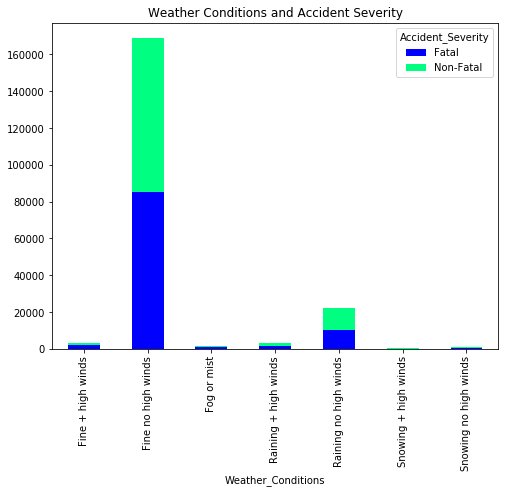

In [147]:
#Stacked histogram
df1 = df_balanced.groupby(['Weather_Conditions', 'Accident_Severity'])['Weather_Conditions'].count().unstack('Accident_Severity')
df1[['Fatal','Non-Fatal']].plot(kind='bar',
                  stacked=True,
                  figsize=(8,6),
                  colormap='winter',
                  title='Weather Conditions and Accident Severity')

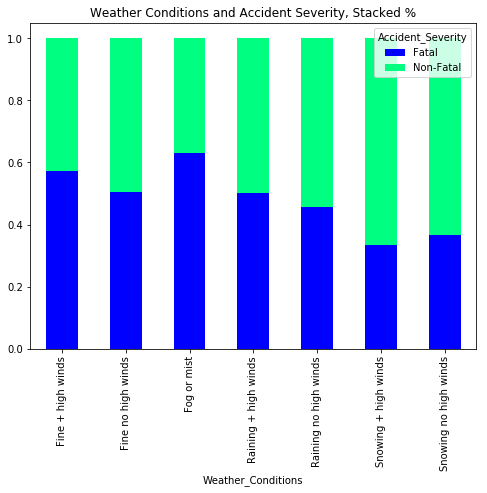

In [148]:
#Stacked percentage
#round(df_balanced.groupby(['Weather_Conditions'])['Accident_Severity'].value_counts(normalize=True)*100,2)
df1_pct = df_balanced.groupby(['Weather_Conditions'])['Accident_Severity'].value_counts(normalize=True).unstack('Accident_Severity')
df1_pct[['Fatal','Non-Fatal']].plot(kind='bar',
                      stacked=True,
                      figsize=(8,6),
                      colormap='winter',
                      title='Weather Conditions and Accident Severity, Stacked %')

#### 2. Urban/Rural and Accident Severity

Accident_Severity    Fatal  Non-Fatal
Urban_or_Rural_Area                  
Rural                64608      35288
Urban                35392      64712


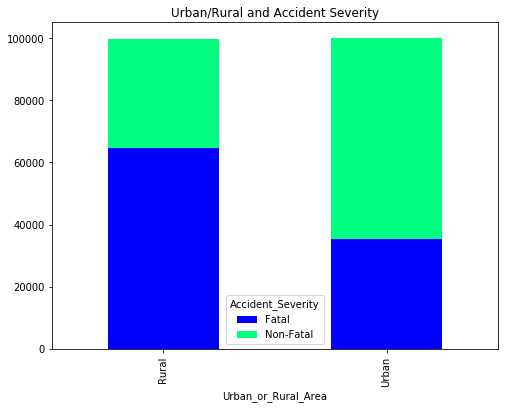

In [149]:
#Stacked histogram
df2 = df_balanced.groupby(['Urban_or_Rural_Area', 'Accident_Severity'])['Urban_or_Rural_Area'].count().unstack('Accident_Severity')
print(df2)
df2[['Fatal','Non-Fatal']].plot(kind='bar',
                  stacked=True,
                  figsize=(8,6),
                  colormap='winter',
                  title='Urban/Rural and Accident Severity')

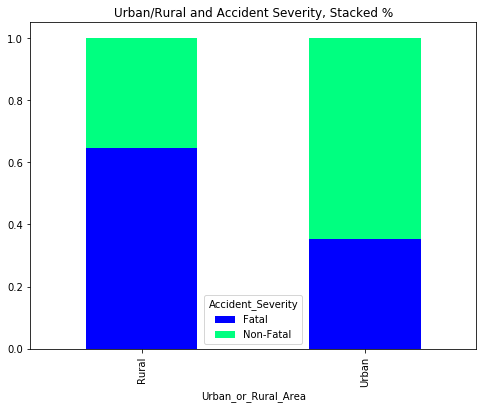

In [150]:
#Stacked percentage
#round(df_balanced.groupby(['Urban_or_Rural_Area'])['Accident_Severity'].value_counts(normalize=True)*100,2)
df2_pct = df_balanced.groupby(['Urban_or_Rural_Area'])['Accident_Severity'].value_counts(normalize=True).unstack('Accident_Severity')
df2_pct[['Fatal','Non-Fatal']].plot(kind='bar',
                  stacked=True,
                  figsize=(8,6),
                  colormap='winter',
                  title='Urban/Rural and Accident Severity, Stacked %')

#### 3. Light Conditions and Accident Severity

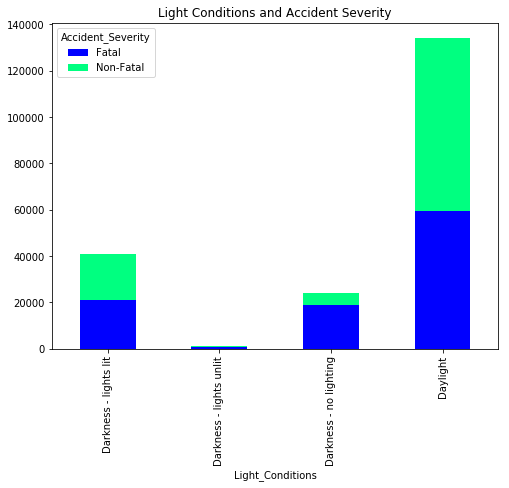

In [151]:
#Stacked histogram
df3 = df_balanced.groupby(['Light_Conditions', 'Accident_Severity'])['Light_Conditions'].count().unstack('Accident_Severity')
df3[['Fatal','Non-Fatal']].plot(kind='bar',
                  stacked=True,
                  figsize=(8,6),
                  colormap='winter',
                  title='Light Conditions and Accident Severity')

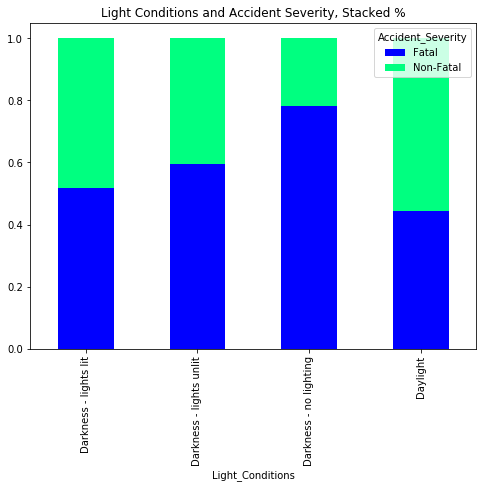

In [152]:
#Stacked percentage
#round(df_balanced.groupby(['Light_Conditions'])['Accident_Severity'].value_counts(normalize=True)*100,2)
df3_pct = df_balanced.groupby(['Light_Conditions'])['Accident_Severity'].value_counts(normalize=True).unstack('Accident_Severity')
df3_pct[['Fatal','Non-Fatal']].plot(kind='bar',
                  stacked=True,
                  figsize=(8,6),
                  colormap='winter',
                  title='Light Conditions and Accident Severity, Stacked %')

#### 4. Speed Limit and Accident Severity

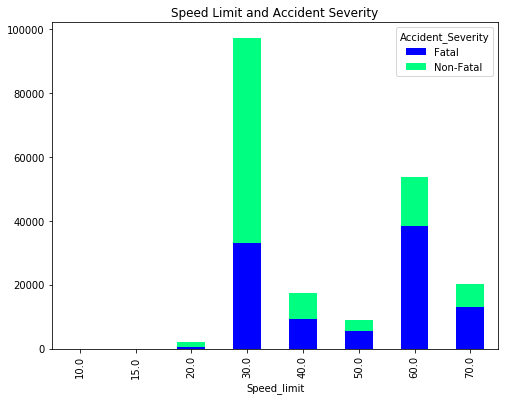

In [153]:
#Stacked histogram
df4 = df_balanced.groupby(['Speed_limit', 'Accident_Severity'])['Speed_limit'].count().unstack('Accident_Severity')
df4[['Fatal','Non-Fatal']].plot(kind='bar',
                  stacked=True,
                  figsize=(8,6),
                  colormap='winter',
                  title='Speed Limit and Accident Severity')

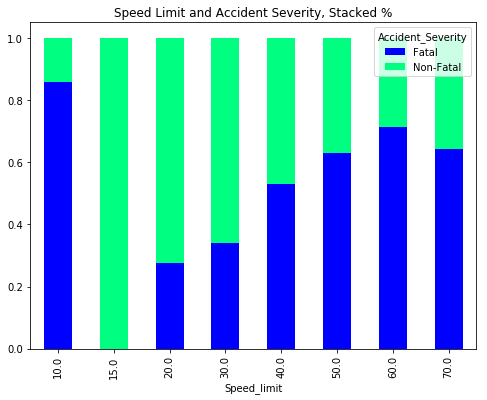

In [154]:
#Stacked percentage
#round(df_balanced.groupby(['Light_Conditions'])['Accident_Severity'].value_counts(normalize=True)*100,2)
df4_pct = df_balanced.groupby(['Speed_limit'])['Accident_Severity'].value_counts(normalize=True).unstack('Accident_Severity')
df4_pct[['Fatal','Non-Fatal']].plot(kind='bar',
                  stacked=True,
                  figsize=(8,6),
                  colormap='winter',
                  title='Speed Limit and Accident Severity, Stacked %')

### Feature Selection and Train/Test Split

Four of the features most strongly correlated (negatively and positively) with the target variable (Accident_Severity) are retained. Variables are then converted using one hot encoding, so that each label is binary.

X and y datasets are created, from the feature set and target variable, respectively.

Using Scikit Learn's train_test_split, the datasets are split with 20% being used as a test set.

Note, since the model we will be using is a logistic regression model, data normalization is not necessary.

In [155]:
X = df_balanced[['Weather_Conditions','Light_Conditions','Urban_or_Rural_Area','Speed_limit']]
X.head()

,Weather_Conditions,Light_Conditions,Urban_or_Rural_Area,Speed_limit
0,Fine no high winds,Daylight,Urban,30.0
1,Fine no high winds,Darkness - no lighting,Rural,60.0
2,Fine no high winds,Daylight,Urban,60.0
3,Fine no high winds,Darkness - no lighting,Rural,60.0
4,Fine no high winds,Daylight,Rural,60.0


In [156]:
X = pd.concat([X,pd.get_dummies(df_balanced['Weather_Conditions'])], axis=1)
X.drop(['Weather_Conditions'], axis=1, inplace=True)

In [157]:
X = pd.concat([X,pd.get_dummies(df_balanced['Light_Conditions'])], axis=1)
X.drop(['Light_Conditions'], axis=1, inplace=True)

In [158]:
X = pd.concat([X,pd.get_dummies(df_balanced['Urban_or_Rural_Area'])], axis=1)
X.drop(['Urban_or_Rural_Area'], axis=1, inplace=True)

In [159]:
X.head()

,Speed_limit,Fine + high winds,Fine no high winds,Fog or mist,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Rural,Urban
0,30.0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,60.0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,60.0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,60.0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,60.0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [171]:
y = df_balanced['Accident_Severity'].values
y[0:5]

array(['Fatal', 'Fatal', 'Fatal', 'Fatal', 'Fatal'], dtype=object)

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
#X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160000, 14) (160000,)
Test set: (40000, 14) (40000,)


### Classification Model: Logistic Regression

Logistic Regression is chosen because it is an efficient way to model very large datasets, where probability of outcome is a useful datapoint. In this situation, where accident severity is predicted, this probability could help the user make a more informed decision.

In [173]:
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression(C=0.1, solver='saga').fit(X_train,y_train)
LR_Model

C:\Users\abode\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

### Evaluate Model

In [174]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [175]:
LR_yhat = LR_Model.predict(X_test)
LR_yhat_prob = LR_Model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.67
LR F1-score: 0.67
LR LogLoss: 0.62


### Confusion Matrix

Our model seems to be moderately inaccurate. A confusion matrix can help us understand which cases are being inaccurately classified in our test set.

In [176]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, LR_yhat, labels=['Fatal','Non-Fatal']))

[[12469  7482]
 [ 5649 14400]]


Normalized confusion matrix
[[0.62 0.38]
 [0.28 0.72]]


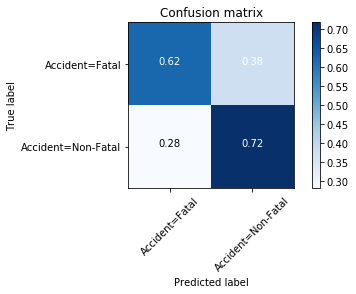

In [177]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LR_yhat, labels=['Fatal','Non-Fatal'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Accident=Fatal','Accident=Non-Fatal'],normalize=True,  title='Confusion matrix')

In [178]:
print(classification_report(y_test, LR_yhat))

              precision    recall  f1-score   support

       Fatal       0.69      0.62      0.66     19951
   Non-Fatal       0.66      0.72      0.69     20049

   micro avg       0.67      0.67      0.67     40000
   macro avg       0.67      0.67      0.67     40000
weighted avg       0.67      0.67      0.67     40000



### Tool for user: predicting accident severity

Select your conditions:

**Weather Conditions:**
* Fine no high winds
* Raining no high winds
* Snowing no high winds
* Fine + high winds
* Raining + high winds
* Snowing + high winds
* Fog or mist


**Light Conditions**
* Daylight
* Darkness - lights lit
* Darkness - lights unlit
* Darkness - no lighting

**Urban or Rural**
* Urban
* Rural

**Speed Limit**
* 20.0
* 30.0
* 40.0
* 50.0
* 60.0
* 70.0

In [179]:
def Predict_Severity(Model, Weather_Conditions,Light_Conditions,Urban_or_Rural_Area,Speed_Limit):
    """
    This function predicts and prints whether your accident would be fatal or non-fatal,
    given a set of inputs (where all except Speed Limit are string; Speed Limit = float
    
    Model should be the Logistic Regression model we created
    
    """
    column_names = ['Speed_Limit',
                    'Fine + high winds',
                    'Fine no high winds',
                    'Fog or mist',
                    'Raining + high winds',
                    'Raining no high winds',
                    'Snowing + high winds',
                    'Snowing no high winds',
                    'Darkness - lights lit',
                    'Darkness - lights unlit',
                    'Darkness - no lighting',
                    'Daylight',
                    'Rural',
                    'Urban']
    
    input_df = pd.DataFrame(columns = column_names)
    input_df.loc[0] = [0]*len(column_names)
    
    input_df.loc[0, Weather_Conditions] = 1
    input_df.loc[0, Light_Conditions] = 1
    input_df.loc[0, Urban_or_Rural_Area] = 1
    input_df.loc[0, 'Speed_Limit'] = Speed_Limit
    
    X_input = [np.array(input_df.iloc[0])]
    
    Y_Predicted = Model.predict(X_input)
    Y_Predicted_Prob = Model.predict_proba(X_input)
    
    return (Y_Predicted, Y_Predicted_Prob)

In [180]:
print(Predict_Severity(LR_Model,'Snowing + high winds','Darkness - no lighting', 'Rural', 60.0))

(array(['Fatal'], dtype=object), array([[0.61, 0.39]]))


In [181]:
print(Predict_Severity(LR_Model,'Fine no high winds','Daylight', 'Urban', 30.0))

(array(['Non-Fatal'], dtype=object), array([[0.29, 0.71]]))
